In [1]:
import json
import matplotlib.pyplot as plt

import numpy as np
import math

In [2]:
fig_size = (8, 6)
dpi = 200
timeStep = 3600 # Seconds

with open('kpis-uc1-rural.json', 'r') as f:
    kpis_uc1 = json.load(f)
    print("KPIs for UC1:")
    [print(i) for i in kpis_uc1.keys()]

with open('kpis-uc2-rural.json', 'r') as f:
    kpis_uc2 = json.load(f)
    print("\nKPIs for UC2:")
    [print(i) for i in kpis_uc2.keys()]


KPIs for UC1:
total_throughput_gbps
daily_avg_throughput_gbps
total_power_consumption_kWh
daily_avg_power_consumption_kWh
yearly_power_estimate_kWh
availability_percentage
blocked_traffic_gbps
throughput_time_series_gbps
power_time_series_kWh

KPIs for UC2:
total_throughput_gbps
daily_avg_throughput_gbps
total_power_consumption_kWh
daily_avg_power_consumption_kWh
yearly_power_estimate_kWh
availability_percentage
blocked_traffic_gbps
throughput_time_series_gbps
power_time_series_kWh


# Gráficas de tráfico

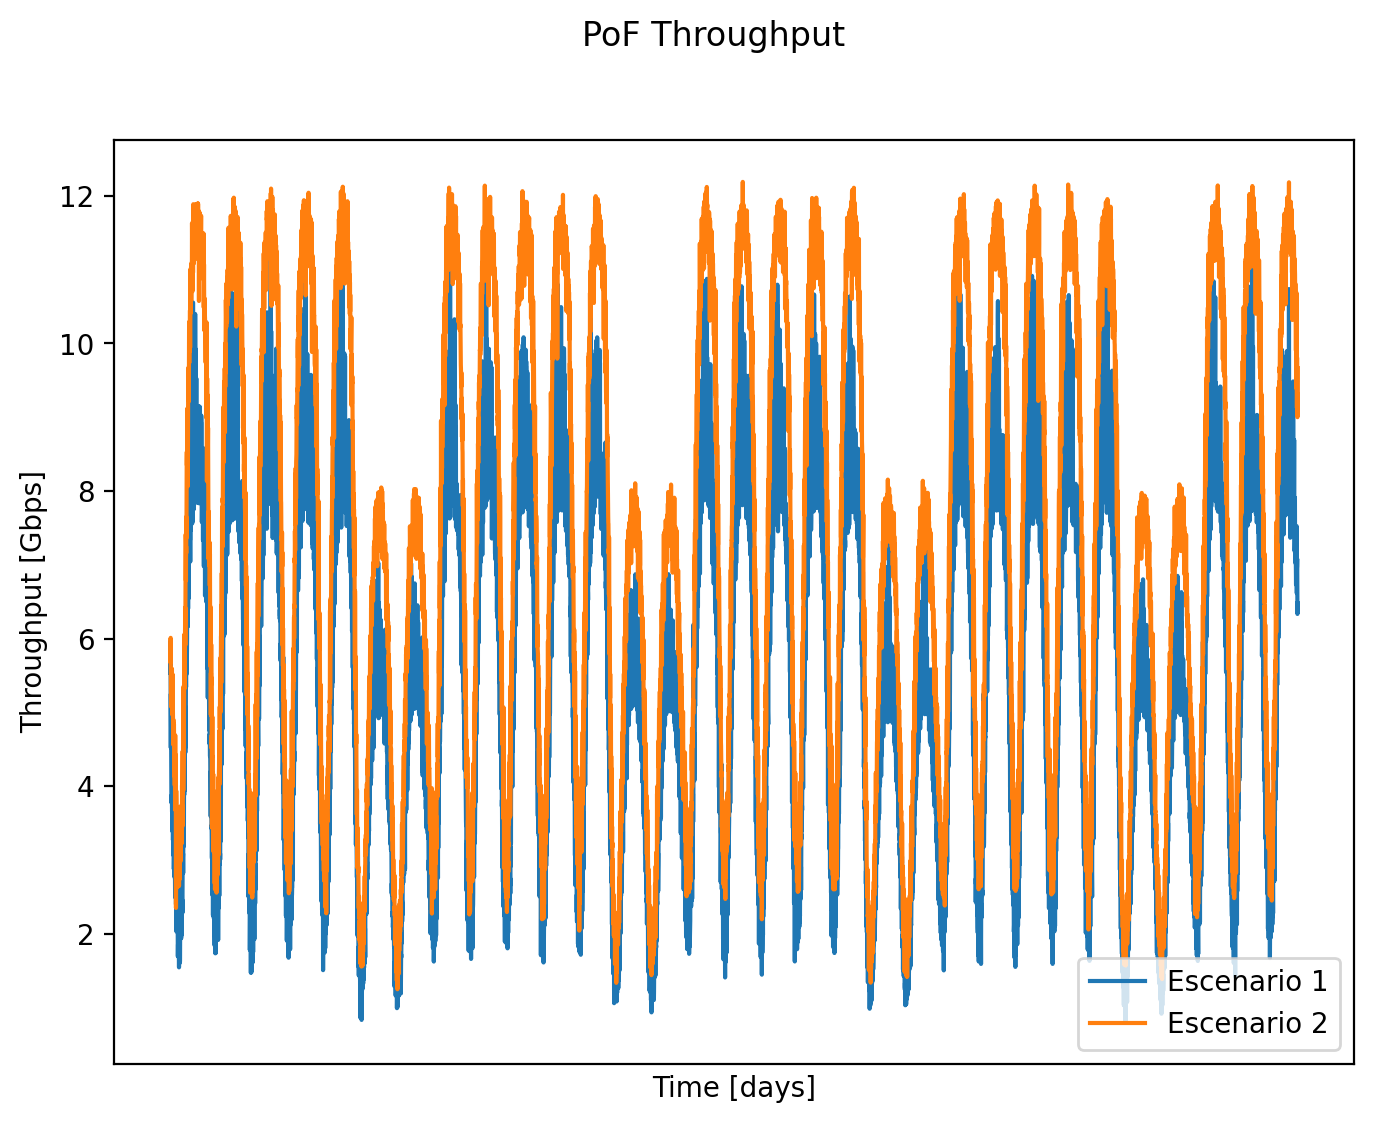

In [3]:
fig, ax = plt.subplots(figsize=fig_size, dpi=dpi)


y_1 = kpis_uc1['throughput_time_series_gbps']
y_2 = kpis_uc2['throughput_time_series_gbps']

# Asumimos que cada muestra es 1 hora, durante 1 mes (~30 días)
num_samples = len(y_1)
timeStep = 60*8
hours_per_sample = 1/timeStep
total_hours = num_samples * hours_per_sample
total_days = total_hours / 24

# Eje X en días
x_1 = np.arange(0, num_samples) * hours_per_sample / 24
x_2 = np.arange(0, len(y_2)) * hours_per_sample / 24

# Configurar los ticks del eje x para mostrar solo los días impares
ax.set_xlabel('Time [days]')
max_tick = math.ceil(x_1[-1])
# Días impares: 1, 3, 5, ..., hasta el máximo día
ticks = np.arange(1, max_tick + 1, 2)
ax.set_xticks(ticks)
ax.set_xticklabels([f'{int(x)}' for x in ticks])

fig.suptitle('PoF Throughput')
ax.plot(x_1[:len(y_1)], y_1, label='Escenario 1')
ax.plot(x_2[:len(y_2)], y_2, label='Escenario 2')
# ax.legend()
ax.set_ylabel('Throughput [Gbps]')
ax.set_xlabel('Time [days]')
ax.legend(loc='lower right')

# Gráficas de potencia

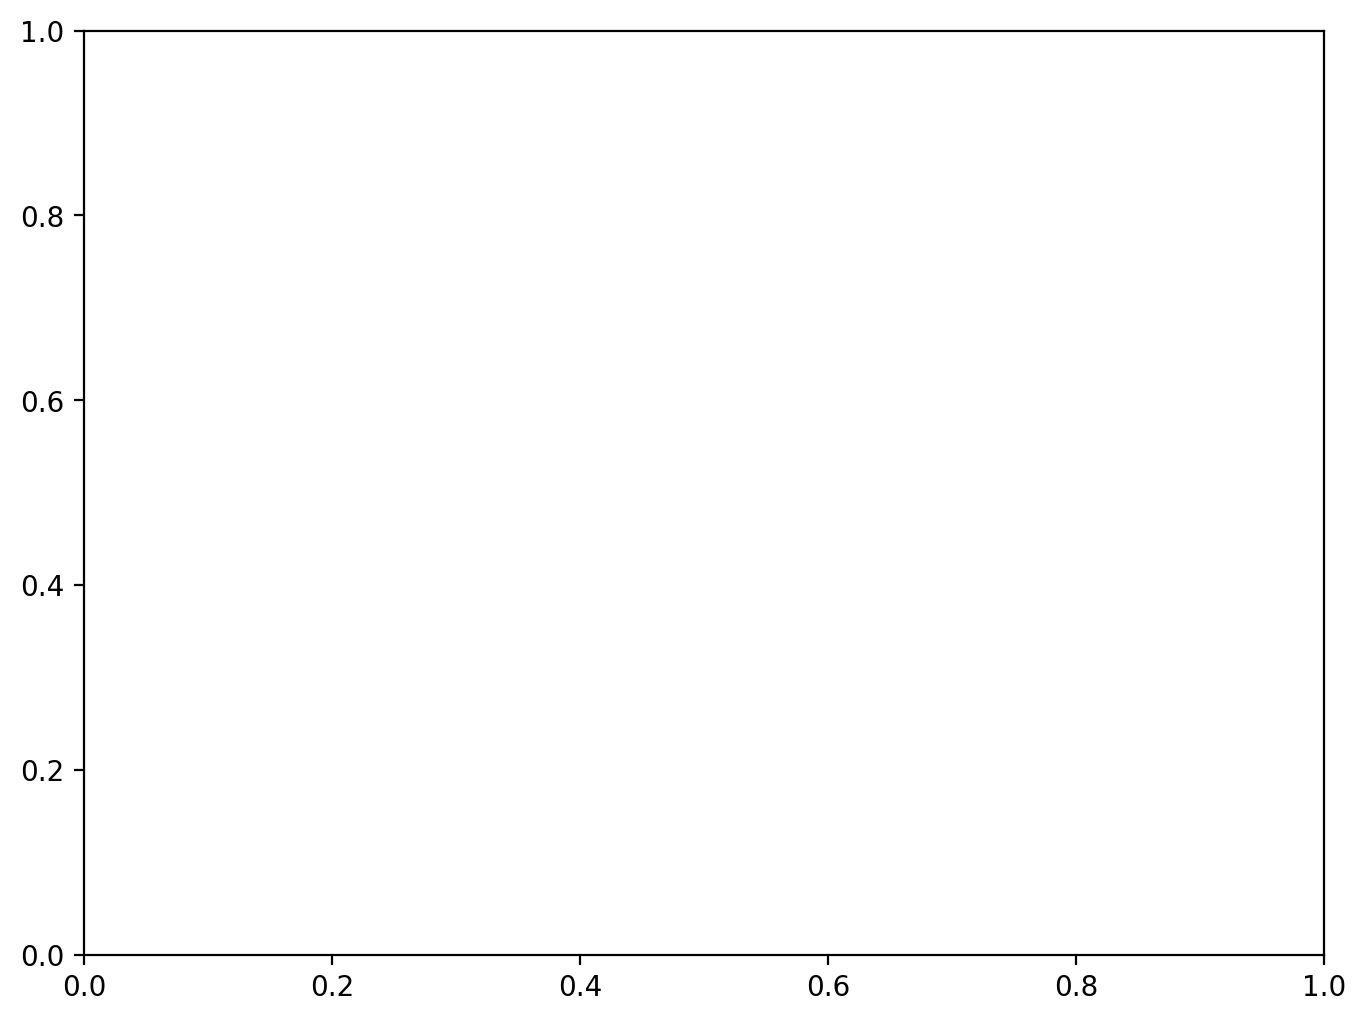

In [4]:
fig, ax = plt.subplots(figsize=fig_size, dpi=dpi)

y_1 = kpis_uc1['power_time_series_kWh']
y_2 = kpis_uc2['power_time_series_kWh']
# Asumimos que cada muestra es 1 hora, durante 1 mes (~31 días)
num_samples = len(y_1)
hours_per_sample = 1
total_hours = num_samples * hours_per_sample
total_days = total_hours / 24

# Eje X en días
x_1 = np.arange(0, num_samples) * hours_per_sample / 24
x_2 = np.arange(0, len(y_2)) * hours_per_sample / 24

## UC1 13 femtos, 2 PoF Pools
$ t = 3600\,\text{s} $ (1 paso de simulación)

- Consumo de femtos: $7\,\text{W}$
- Consumo de cada femto: $0.7\,\text{W}$
- Número de femtos activas: $10\,\text{femtos}$ (utilizar 10 HPLDs)
- Número de PoF Pools: $2$
- Número de láseres: $2 \times 5 = 10\,\text{HPLDs}$ (equivalente a alimentar 10 femtoceldas simultáneas)

$
p_{on} = 10 \times (0.0136 \times 30 + 27.34) = 10 \times 27.748 = 277.48\,\text{W} = 0.28\,\text{kW}
$

$
p_{off} = (10-10) \times 27.34 = 0\,\text{kW}
$

$
p_{total} = p_{on} + p_{off} = 0.28\,\text{kW}
$

Teniendo en cuenta que el delta de tiempo $\Delta t$ (timeStep) es 1 hora:
$
\text{Energía} = p_\text{total} \times \Delta t = 0.28\,\text{kWh}
$

¿Se asemeja con el cálculo obtenido en los cálculos de la celda anterior? $0.28\,\text{kWh}$ → sí, es correcto.

## UC2 13 femtos, 4 PoF Pools
$ t = 3600\,\text{s} $ (1 paso de simulación)

- Consumo de femtos: $9.1\,\text{W}$
- Consumo de cada femto: $0.7\,\text{W}$
- Número de femtos activas: $13\,\text{femtos}$ (utilizar 13 HPLDs)
- Número de PoF Pools: $4$
- Número de láseres: $4 \times 5 = 20\,\text{HPLDs}$ (equivalente a alimentar 20 femtoceldas simultáneas)

$
p_{on} = 13 \times (0.0136 \times 30 + 27.34) = 13 \times 27.748 = 360.724\,\text{W} = 0.36\,\text{kW}
$

$
p_{off} = 0 \,\text{kW}
$

$
p_{total} = p_{on} + p_{off} = 0.36\,\text{kW}
$

Teniendo en cuenta que el delta de tiempo $\Delta t$ (timeStep) es 1 hora:
$
\text{Energía} = p_{total} \times \Delta t = 0.36\,\text{kWh}
$

¿Se asemeja con el cálculo obtenido en los cálculos de la celda anterior? $0.388\,\text{kWh}$ → sí, es correcto.